<a href="https://colab.research.google.com/github/ophir91/Iplab_5/blob/master/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5 - Image Restoration

## Goal: Introduction to image restoration

Imports:

In [0]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform,io,util,img_as_float
import cv2

Few help functions:

In [0]:
def getGaussianKernel2d(ncols, nrows, sigmax=30, sigmay=30):
    # Build a Gaussian filter.
    cy, cx = nrows/2, ncols/2
    x = np.linspace(0, nrows, nrows)
    y = np.linspace(0, ncols, ncols)
    X, Y = np.meshgrid(x, y)
    gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
    return gmask

def applyFilter2d(img, blur_kernel_spectrum):
    N = img.shape[0]
    M = img.shape[1] 
    img_spectrum = np.fft.fftshift(np.fft.fft2(img, s=(N,M)))
    img_blurred_spectrum = img_spectrum * blur_kernel_spectrum
    img_blurred_using_dft = np.abs(np.fft.ifft2(img_blurred_spectrum))
    return img_blurred_using_dft

Load image and add blurring and noise:

Image shape:(512, 512), Image data type:float64


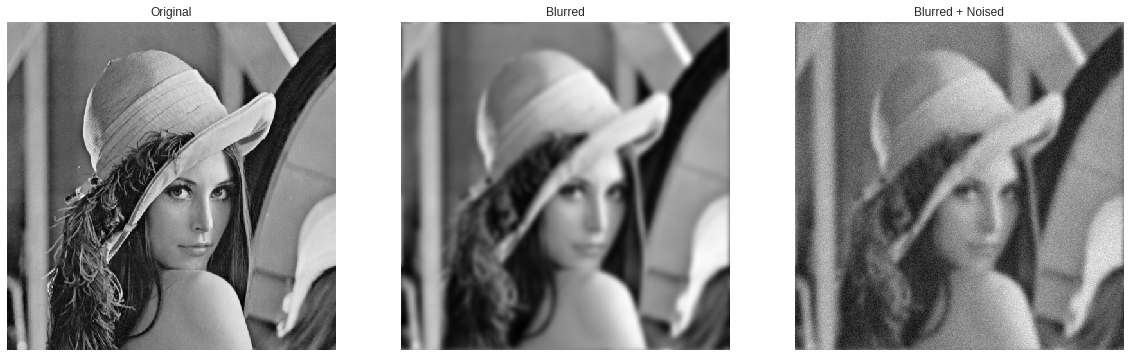

In [3]:
img = io.imread('lena.gif')
img = img_as_float(img)
print ("Image shape:{}, Image data type:{}".format(img.shape,img.dtype))

filter_blur = getGaussianKernel2d(ncols=img.shape[0], nrows=img.shape[1])
blurred  = applyFilter2d(img,filter_blur)
noise = util.random_noise(blurred,mean=0,var=0.001)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(blurred, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(noise, cmap='gray'),plt.title('Blurred + Noised')
plt.xticks([]), plt.yticks([])
plt.show()

###  Part 1 - Inverse Filter

1. Test the restoration with the Inverse Filter for deblurring and denoising

In [0]:
def InvertFilter(noise_img,filter_blur):
    # Paste your implementaion of Inverse Filter here
    H = filter_blur
    H_IN = (1./H)
    F = np.fft.fft2(noise_img)
    F = np.fft.fftshift(F)
    fft_noise_img = F * H_IN
    clean_img = np.fft.ifft2(fft_noise_img)
    denosie_img = np.abs(clean_img)
    pass

    return denosie_img
    

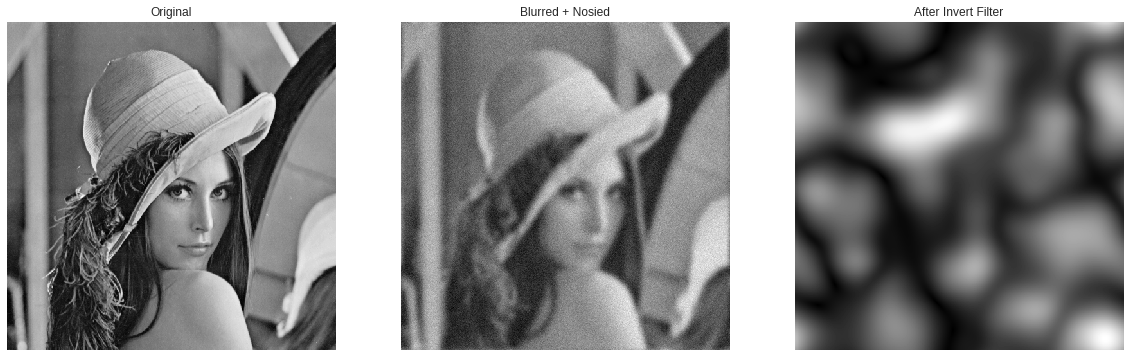

In [5]:
denosie_Invert_img = InvertFilter(noise,filter_blur)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(noise, cmap='gray'),plt.title('Blurred + Nosied')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(denosie_Invert_img, cmap='gray'),plt.title('After Invert Filter')
plt.xticks([]), plt.yticks([])
plt.show()

2. What is the problem with the Inverse Filter? How can this be solved?

# Insert your answer here

### Part 2 - Pseudo Inverse Filter

1. Test the restoration with the Pseudo Inverse Filter for deblurring and denoising

In [0]:
def PseudoInvertFilter(noise_img, filter_blur, epsilon=0.05):
    # Paste your implementaion of Pseudo Inverse Filter here
    H = filter_blur
    index = np.where(H > epsilon)
    H_PIN = np.zeros(noise_img.shape)
    H_PIN[index] = (1./H)[index]

    F = np.fft.fft2(noise_img)
    F = np.fft.fftshift(F)
    fft_noise_img = F * H_PIN
    clean_img = np.fft.ifft2(fft_noise_img)
    denosie_img = np.abs(clean_img)
    
    pass

    return denosie_img
    

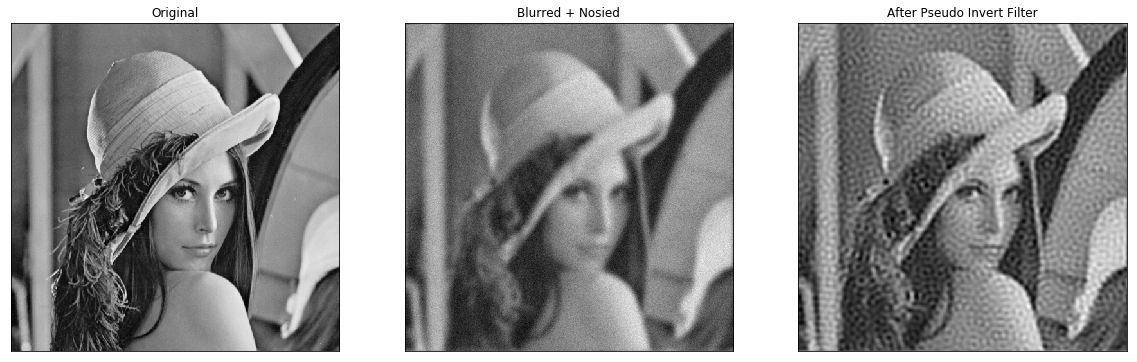

In [0]:
denosie_pseudo_img = PseudoInvertFilter(noise,filter_blur)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(noise, cmap='gray'),plt.title('Blurred + Nosied')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(denosie_pseudo_img, cmap='gray'),plt.title('After Pseudo Invert Filter')
plt.xticks([]), plt.yticks([])
plt.show()

The Root Mean Square (RMS) error of restoration is defined in the following way:
\begin{equation*}
RMS = \left( \frac{1}{MN}  \sum_{k=0}^{M-1} \sum_{k=0}^{N-1} (\hat{f}(i,j)-f(i,j))^2 \right)^{0.5}
\end{equation*}

where $f(i, j)$ is the original image, $\hat{f}(i,j)$ is the restored image and both images are of size $M \times N$


2. Plot the graph of the RMS error (Y axis) versus the parameter $\epsilon$(X axis) and Show the result of the best restoration.

(the variance of the noise $\sigma _n ^2$ is fixed to the default value in the supplied program).


In [0]:
# Insert your code here

3. Now fix the parameter $\epsilon = 0.4$.
Plot the graph of the Root Mean Square (RMS) error of restoration (Y axis) versus the
variance of the noise $\sigma_n^2$ (X axis).

In [0]:
# Insert your code here

4. For what maximal value of the variance of noise you still get an acceptable restoration?

# Insert your answer here


### Part 3 - Wiener Filter

1. Test the restoration with the Wiener Filter for deblurring and denoising

Assume that the variance used in the Wiener filter formula is equal to the variance of the noise $\sigma_n^2$
, and both of them are equal to 0.01 (for image in a range of 0-1) or 0.01 ∗ 2552
(for image in a range of 0-255).

In [0]:
def WienerFilter(noise_img):
    # Paste your implementaion of Wiener Filter here
    denosie_img = noise_img
    pass

    return denosie_img

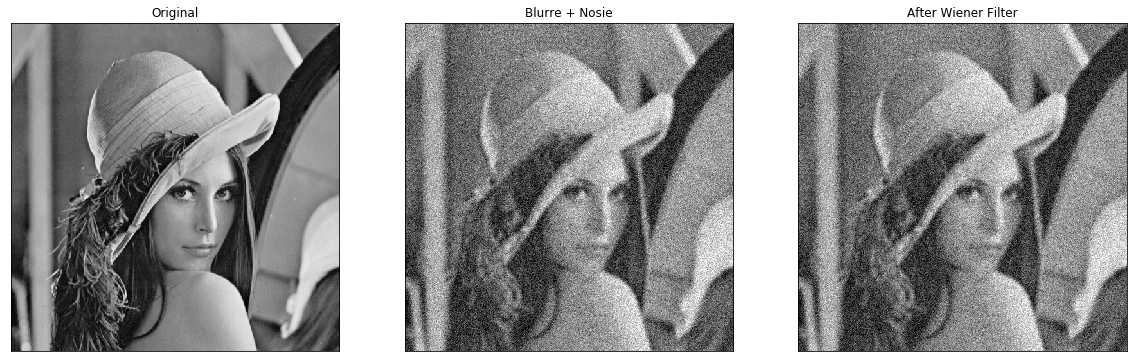

In [0]:
denosie_wiener_img = WienerFilter(noise)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(noise, cmap='gray'),plt.title('Blurre + Nosie')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(denosie_wiener_img, cmap='gray'),plt.title('After Wiener Filter')
plt.xticks([]), plt.yticks([])
plt.show()

### Part 4 - Deep learning (DnCNN)

1. After using a few filters to restoration the image, Lets try with the new approch **Deep learning** and compre the results

For building the neural network we will use the [PyTorch framwork](https://pytorch.org/) 

Because of lack of time we aren't going to train the network here.
We will use a pretrained model

In [0]:
# installing pytorch on remote computer:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

Few more imports for using pytorch:

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

Now we will define the architecture of the neural network.

We will implement the [DnCNN](http://www4.comp.polyu.edu.hk/~cslzhang/paper/DnCNN.pdf) architecture:

![alt text](http://www.hitechsolutions.info/images/project_img/20170821055539_GAUSSIAN%20DENOISER.jpg)

Has you can see the architecture is a class that inherit from nn.Module (pytorch module) 

In [0]:
class DnCNN(nn.Module):
    def __init__(self, channels, num_of_layers=17):
        super(DnCNN, self).__init__()
        kernel_size = 3
        padding = 1
        features = 64
        layers = []
        layers.append(nn.Conv2d(in_channels=channels, out_channels=features, kernel_size=kernel_size, padding=padding, bias=False))
        layers.append(nn.ReLU(inplace=True))
        for _ in range(num_of_layers-2):
            layers.append(nn.Conv2d(in_channels=features, out_channels=features, kernel_size=kernel_size, padding=padding, bias=False))
            layers.append(nn.BatchNorm2d(features))
            layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Conv2d(in_channels=features, out_channels=channels, kernel_size=kernel_size, padding=padding, bias=False))
        self.dncnn = nn.Sequential(*layers)
    def forward(self, x):
        out = self.dncnn(x)
        return out


In [0]:
def DnCNN_network(noise_img, num_of_layers=17, model_path='net.pth'):
    # load pretrain model
    print('Loading model ...\n')
      
    net = DnCNN(channels=1, num_of_layers=num_of_layers)
    traind_model = nn.DataParallel(net)
    
    pretraind = torch.load(model_path)

    traind_model.load_state_dict(pretraind)
    traind_model.double()
    traind_model.eval()

    noise_img = np.expand_dims(noise_img, 0) # batch dim
    noise_img = np.expand_dims(noise_img, 1) # channels dim
    noise_img = torch.DoubleTensor(noise_img)
    INoisy = Variable(noise_img)
    with torch.no_grad(): # this can save much memory
        print("Inserting the noisy image...\n")
        the_noise_that_we_learned = traind_model(INoisy)
        plt.imshow(the_noise_that_we_learned.squeeze(), cmap='gray'),plt.title('The noise that the network predict')
        plt.show()
        Out = torch.clamp(INoisy.cpu() - the_noise_that_we_learned.cpu(), 0., 1.)
    return Out.squeeze()



Loading model ...

Inserting the noisy image...



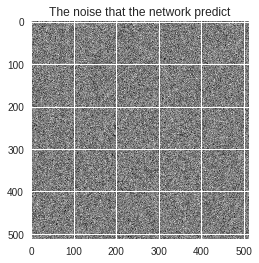

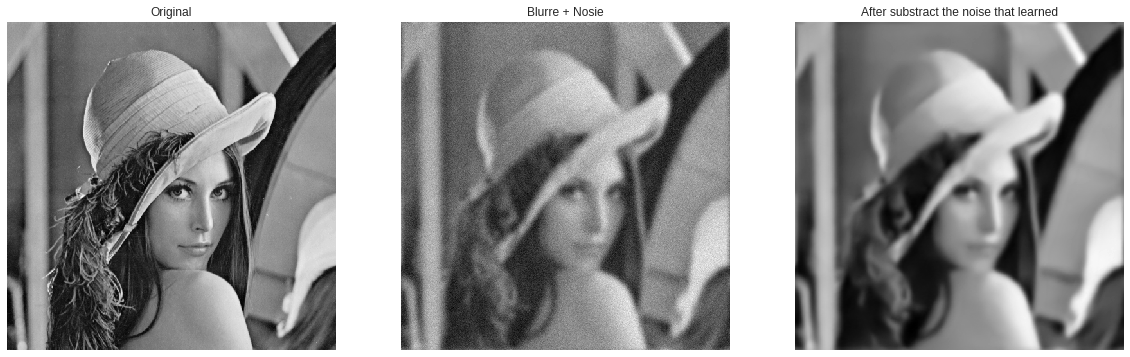

In [16]:
denosie_dncnn_img = DnCNN_network(noise)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(noise, cmap='gray'),plt.title('Blurre + Nosie')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(denosie_dncnn_img, cmap='gray'),plt.title('After substract the noise that learned')
plt.xticks([]), plt.yticks([])
plt.show()

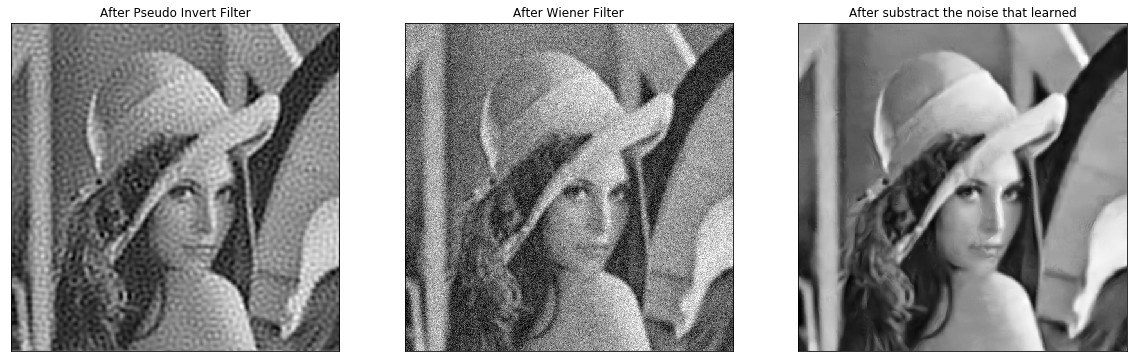

In [0]:
plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(denosie_pseudo_img, cmap='gray'),plt.title('After Pseudo Invert Filter')
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(denosie_wiener_img, cmap='gray'),plt.title('After Wiener Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(denosie_dncnn_img, cmap='gray'),plt.title('After substract the noise that learned')
plt.xticks([]), plt.yticks([])
plt.show()